In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
img_bgr = cv2.imread("../KendiResmim.jpg", cv2.IMREAD_COLOR)
print(img_bgr.shape)

(1198, 1198, 3)


In [3]:
x_bgr = kornia.image_to_tensor(img_bgr, keepdim=False)
x_rgb = kornia.bgr_to_rgb(x_bgr)
print(x_rgb.shape)

torch.Size([1, 3, 1198, 1198])


Normalize

In [4]:
x_rgb = x_rgb.float() / 255.0

Perspectif Dönüşümü

In [5]:
# Kırpılacak kaynak piksel koordinatları
points_src = torch.tensor([[
    [125., 150.], [562., 40.], [562., 282.], [54., 328.],
]])

# noktaların varacağı piksel koordinatları
h, w = 64, 128  # destination size
points_dst = torch.tensor([[
    [0., 0.], [w - 1., 0.], [w - 1., h - 1.], [0., h - 1.],
]])

In [6]:
# perspectif dönüşüm matrisi
perspec_matrix = kornia.get_perspective_transform(points_src, points_dst)

data_wrap = kornia.warp_perspective(x_rgb.float(), perspec_matrix, dsize=(h, w))

In [12]:
img_warp = kornia.tensor_to_image(data_wrap)
img_rgb = kornia.tensor_to_image(x_rgb)

Noktaları işaretle

In [20]:
for i in range(4):
    center = tuple(points_src[0, i].long().numpy())
    img_rgb = cv2.circle(img_rgb.copy(), center, 5, (0, 0, 0), -1)  # (0, 0, 0) -> noktanın rengi


create the plot

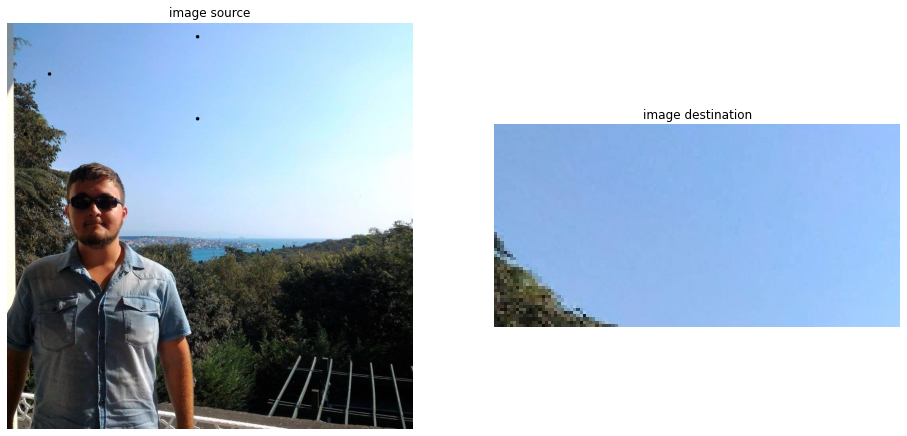

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img_rgb)

axs[1].axis('off')
axs[1].set_title('image destination')
axs[1].imshow(img_warp)